In [ ]:
# Build insurance price prediction model using Neural Network. 
# Dataset insurance.csv

In [21]:
# Importing all the required libraries 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import numpy as np

# Load the dataset

data = pd.read_csv("/Users/diboshbaruah/Desktop/Python/insurance.csv")
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [23]:
# Checking the dataset for missing values

missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [25]:
# Converting categorical variables to dummy variables

data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


In [27]:
# Separating features and target variable

X = data.drop(['charges'], axis=1)
y = data['charges']


In [29]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Scaling features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling target variable

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


In [35]:
# Model definition using Input layer

model = Sequential()

# Input layer

model.add(Input(shape=(X_train_scaled.shape[1],)))  
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

# Output layer for regression

model.add(Dense(1, activation='linear'))  


In [37]:
# Compiling the model

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to prevent overfitting

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model

history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=200, batch_size=32, verbose=0, 
                    callbacks=[early_stopping])

# Evaluating the model on the test set

test_loss = model.evaluate(X_test_scaled, y_test_scaled)  # Use scaled target variable for evaluation
print(f'Test Loss (Mean Squared Error): {test_loss}')
print()

# Making predictions on the test set

y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the scaled predictions to get them back to the original scale

y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Calculate the R² score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")
print()

# Displaying first few predictions vs actual values

for i in range(5):
    print(f"Actual: {y_test.values[i]}, Predicted: {y_pred[i][0]}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.1588
Test Loss (Mean Squared Error): 0.1680583953857422

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
R² Score: 0.8781121509749372

Actual: 9095.06825, Predicted: 10643.34765625
Actual: 5272.1758, Predicted: 6452.68798828125
Actual: 29330.98315, Predicted: 29259.744140625
Actual: 9301.89355, Predicted: 9031.486328125
Actual: 33750.2918, Predicted: 29830.265625


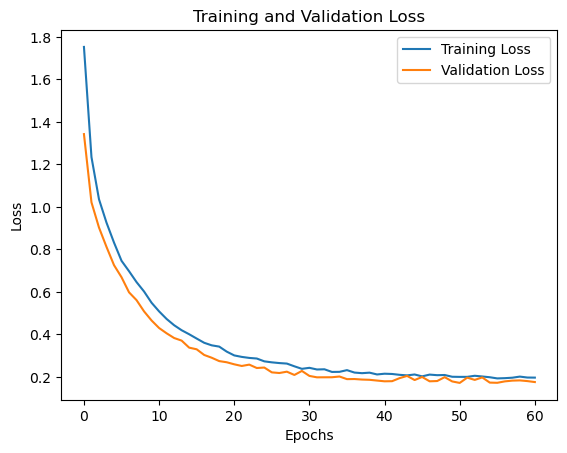

In [39]:
# Plotting the training and validation loss curves to analyze overfitting

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()